In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
reviews = pd.read_csv("winemag-data_first150k.csv.gz", compression="gzip")
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


<AxesSubplot: >

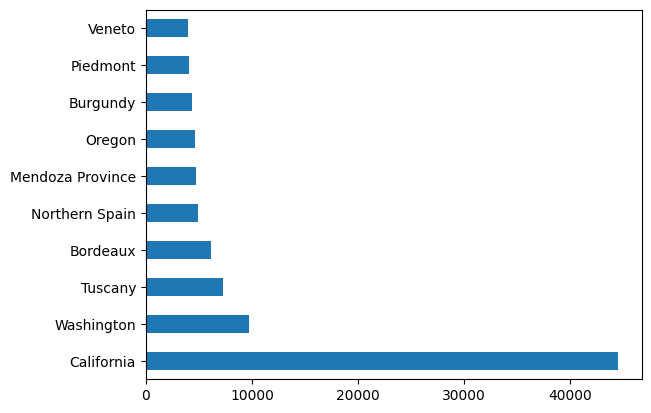

In [44]:
reviews["province"].value_counts().head(10).plot(kind="barh")

<AxesSubplot: >

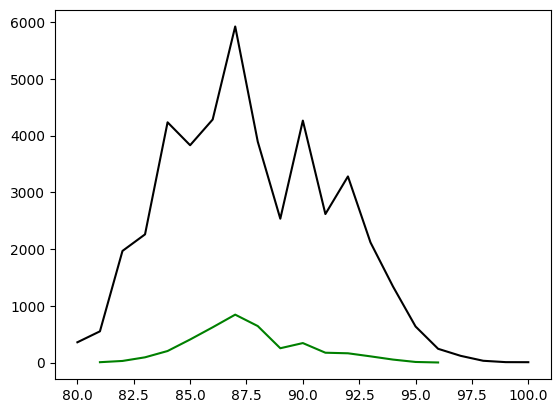

In [48]:
reviews[reviews["province"] == "California"]['points'].value_counts().sort_index().plot(color="black")
reviews[reviews["province"] == "Veneto"]['points'].value_counts().sort_index().plot(color="g")


<AxesSubplot: >

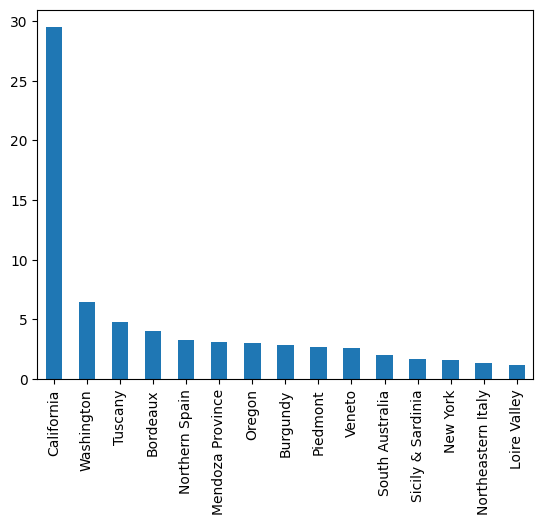

In [26]:
(reviews["province"].value_counts().head(15) / len(reviews) * 100).plot.bar()

<AxesSubplot: >

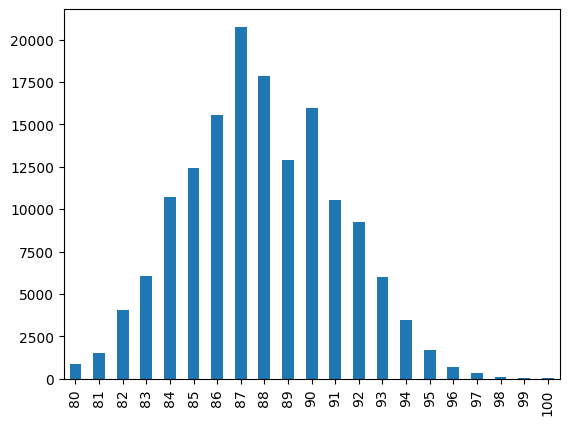

In [35]:
reviews['points'].value_counts().sort_index().plot(kind="bar")

<AxesSubplot: >

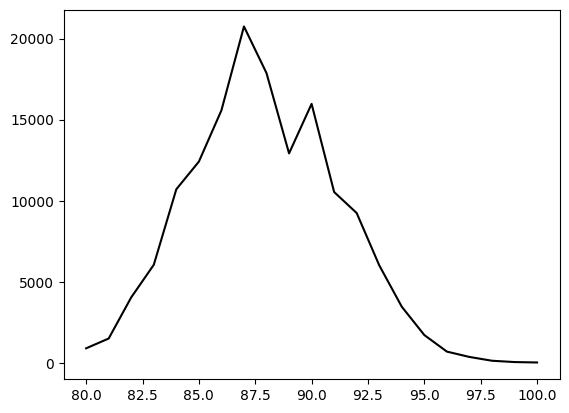

In [55]:
reviews['points'].value_counts().sort_index().plot(color="black")

<AxesSubplot: ylabel='Frequency'>

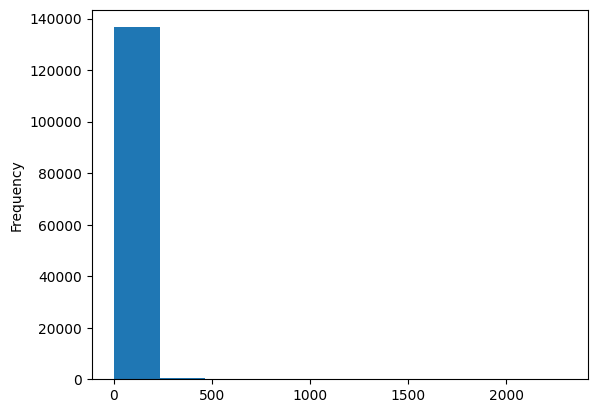

In [50]:
reviews['price'].plot.hist()

In [51]:
reviews.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


<AxesSubplot: ylabel='Frequency'>

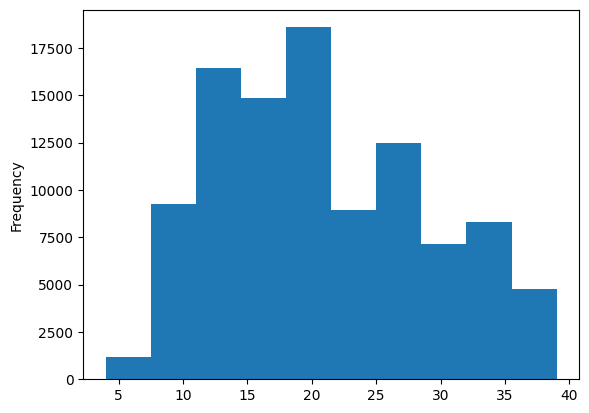

In [53]:
reviews[reviews['price'] < 40]["price"].plot.hist()

# Многомерные графики

<AxesSubplot: xlabel='price', ylabel='points'>

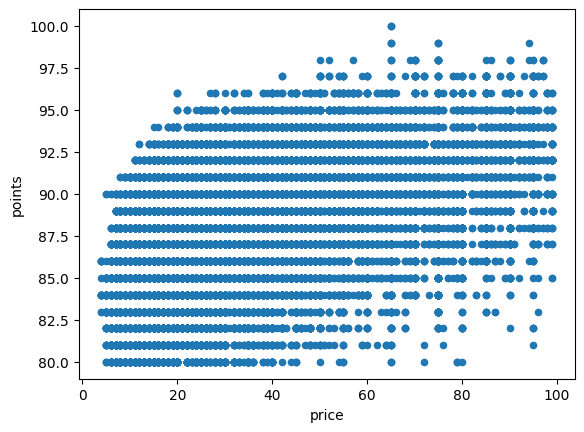

In [60]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

<AxesSubplot: xlabel='price', ylabel='points'>

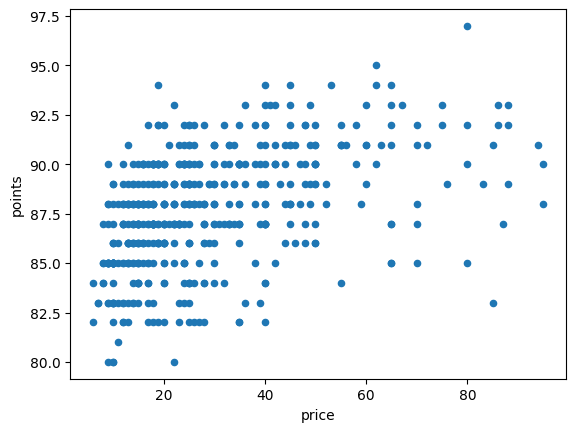

In [65]:
reviews[reviews['price'] < 100].sample(500).plot.scatter(x='price', y='points')

<AxesSubplot: xlabel='price', ylabel='points'>

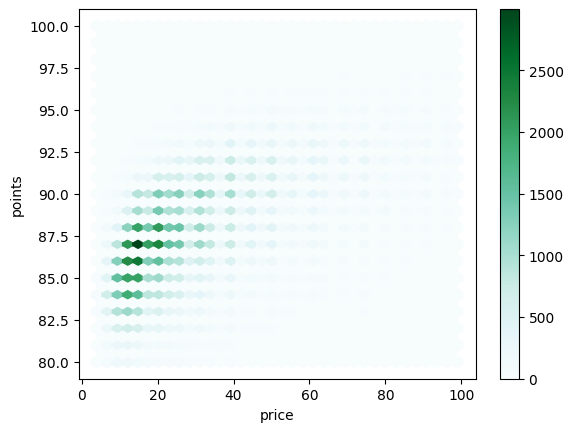

In [71]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=35)

In [103]:
reviews[reviews['variety'].isin(list(reviews['variety'].value_counts().head(5).index))].groupby(["variety", 'points'])['points'].count().unstack().T.to_csv('win_score_couunts.csv')

In [106]:
wine_score = pd.read_csv("win_score_couunts.csv",index_col=0)
wine_score

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,89.0,70.0,36.0,75.0
81,23.0,160.0,154.0,86.0,108.0
82,83.0,436.0,523.0,296.0,233.0
83,122.0,571.0,686.0,350.0,366.0
84,334.0,925.0,1170.0,757.0,623.0
85,379.0,1058.0,1299.0,903.0,608.0
86,467.0,1205.0,1525.0,1260.0,919.0
87,679.0,1589.0,1887.0,1784.0,1375.0
88,741.0,1160.0,1513.0,1586.0,1366.0


<AxesSubplot: xlabel='points'>

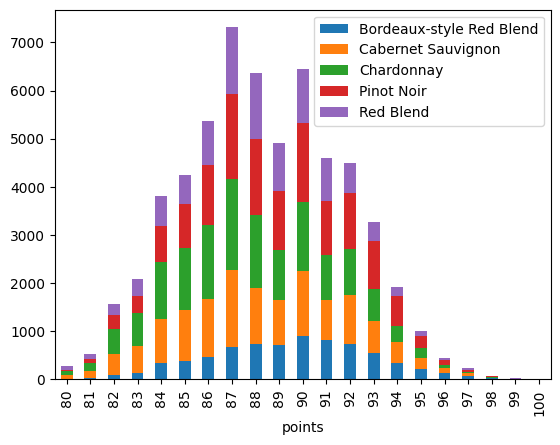

In [110]:
wine_score.plot.bar(stacked=1)

<AxesSubplot: xlabel='points'>

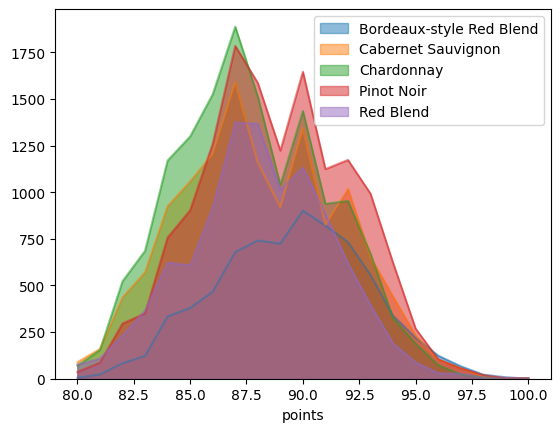

In [115]:
wine_score.plot.area(stacked=0)

<AxesSubplot: xlabel='points'>

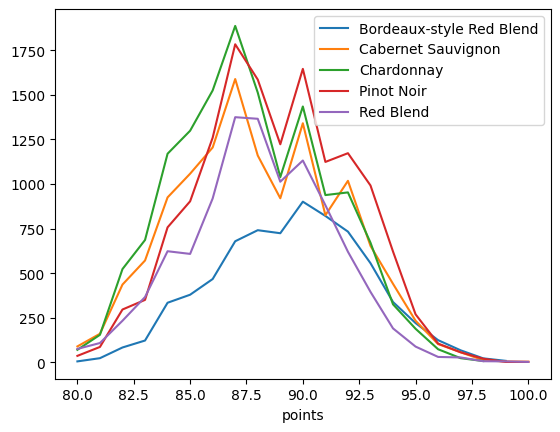

In [116]:
wine_score.plot.line()